In [1]:
%matplotlib inline
import radical.analytics as ra
import radical.pilot as rp
import radical.utils as ru
import radical.entk as re
import more_itertools as mit
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import json
from scipy.optimize import curve_fit
from scipy import stats
from pprint import pprint
from sklearn.metrics import r2_score
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
!radical-stack


  python               : 2.7.16
  pythonpath           : 
  virtualenv           : radical.analytics

  radical.analytics    : v0.50.0-10-g76b5950@devel
  radical.entk         : 0.7.8
  radical.pilot        : 0.50.16
  radical.utils        : 0.50.2
  saga                 : 0.50.0



In [2]:
des1DF = pd.DataFrame(columns=['TTX','AgentOverhead','ClientOverhead','EnTKOverhead'])

sids=['Des3Images1','Des3Images7','Des3Images6']
for sid in sids:
    re_session = ra.Session(stype='radical.entk',src='../Data/'+sid+'/',sid=sid)
    rp_session = ra.Session(stype='radical.pilot',src='../Data/'+sid)
    units = rp_session.filter(etype='unit', inplace=False)
    pilot = rp_session.filter(etype='pilot', inplace=False)
    units_duration = units.duration(event=[{ru.EVENT: 'exec_start'},{ru.EVENT: 'exec_stop'}])
    units_agent = units.duration([rp.AGENT_STAGING_INPUT, rp.UMGR_STAGING_OUTPUT_PENDING])
    units_client = units.duration([rp.NEW, rp.DONE])
    appmanager = re_session.filter(etype='appmanager',inplace=False)
    resource_manager = re_session.filter(etype='resource_manager',inplace=False)
    app_duration = appmanager.duration(event=[{ru.EVENT:"amgr run started"},{ru.EVENT:"start termination"}])
    res_duration = resource_manager.duration(event=[{ru.EVENT:"rreq submitted"},{ru.EVENT:"resource active"}])

    ttx = units_duration
    agent_overhead = units_agent - units_duration
    client_overhead = units_client - units_agent
    entk_overhead =  app_duration - units_client - res_duration
    des1DF.loc[len(des1DF)] = [ttx, agent_overhead, client_overhead, entk_overhead]
    

In [3]:
des1DF

,TTX,AgentOverhead,ClientOverhead,EnTKOverhead
0,72054.0068,0.0769,17.0754,180.8971
1,81743.9908,0.1942,18.6209,176.4938
2,75806.0183,0.2275,18.6695,169.7319


In [4]:
des2DF = pd.DataFrame(columns=['TTX','SetupOverhead','SetupOverhead2','AgentOverhead','ClientOverhead'])
sids = ['../Data/Design1M5','../Data/Design1M8'] 
for sid in sids:
    Node1 = pd.DataFrame(columns=['Start','End','Type'])
    Node1Tilling = pd.read_csv(sid+'/pilot.0000/unit.000002/tilling1.csv')
    for index,row in Node1Tilling.iterrows():
        Node1.loc[len(Node1)] = [row['Start'],row['End'],'Tile1']
    Node1Tilling = pd.read_csv(sid+'/pilot.0000/unit.000002/tilling2.csv')
    for index,row in Node1Tilling.iterrows():
        Node1.loc[len(Node1)] = [row['Start'],row['End'],'Tile2']
    Node1Tilling = pd.read_csv(sid+'/pilot.0000/unit.000002/tilling3.csv')
    for index,row in Node1Tilling.iterrows():
        Node1.loc[len(Node1)] = [row['Start'],row['End'],'Tile3']
    Node1Tilling = pd.read_csv(sid+'/pilot.0000/unit.000002/pred1.csv')
    for index,row in Node1Tilling.iterrows():
        Node1.loc[len(Node1)] = [row['Start'],row['End'],'Pred1']
    Node1Tilling = pd.read_csv(sid+'/pilot.0000/unit.000002/pred2.csv')
    for index,row in Node1Tilling.iterrows():
        Node1.loc[len(Node1)] = [row['Start'],row['End'],'Pred2']
    Node2 = pd.DataFrame(columns=['Start','End','Type'])
    Node2Tilling = pd.read_csv(sid+'/pilot.0000/unit.000003/tilling09.csv')
    for index,row in Node2Tilling.iterrows():
        Node2.loc[len(Node2)] = [row['Start'],row['End'],'Tile4']
    Node2Tilling = pd.read_csv(sid+'/pilot.0000/unit.000003/tilling10.csv')
    for index,row in Node2Tilling.iterrows():
        Node2.loc[len(Node2)] = [row['Start'],row['End'],'Tile5']
    Node2Tilling = pd.read_csv(sid+'/pilot.0000/unit.000003/tilling11.csv')
    for index,row in Node2Tilling.iterrows():
        Node2.loc[len(Node2)] = [row['Start'],row['End'],'Tile6']
    Node2Tilling = pd.read_csv(sid+'/pilot.0000/unit.000003/pred3.csv')
    for index,row in Node2Tilling.iterrows():
        Node2.loc[len(Node2)] = [row['Start'],row['End'],'Pred3']
    Node2Tilling = pd.read_csv(sid+'/pilot.0000/unit.000003/pred4.csv')
    for index,row in Node2Tilling.iterrows():
        Node2.loc[len(Node2)] = [row['Start'],row['End'],'Pred4']
    Node3 = pd.DataFrame(columns=['Start','End','Type'])
    Node3Tilling = pd.read_csv(sid+'/pilot.0000/unit.000004/tilling17.csv')
    for index,row in Node3Tilling.iterrows():
        Node3.loc[len(Node3)] = [row['Start'],row['End'],'Tile7']
    Node3Tilling = pd.read_csv(sid+'/pilot.0000/unit.000004/tilling18.csv')
    for index,row in Node3Tilling.iterrows():
        Node3.loc[len(Node3)] = [row['Start'],row['End'],'Tile8']
    Node3Tilling = pd.read_csv(sid+'/pilot.0000/unit.000004/tilling19.csv')
    for index,row in Node3Tilling.iterrows():
        Node3.loc[len(Node3)] = [row['Start'],row['End'],'Tile9']
    Node3Tilling = pd.read_csv(sid+'/pilot.0000/unit.000004/pred5.csv')
    for index,row in Node3Tilling.iterrows():
        Node3.loc[len(Node3)] = [row['Start'],row['End'],'Pred5']
    Node3Tilling = pd.read_csv(sid+'/pilot.0000/unit.000004/pred6.csv')
    for index,row in Node3Tilling.iterrows():
        Node3.loc[len(Node3)] = [row['Start'],row['End'],'Pred6']
    Node4 = pd.DataFrame(columns=['Start','End','Type'])
    Node4Tilling = pd.read_csv(sid+'/pilot.0000/unit.000005/tilling25.csv')
    for index,row in Node4Tilling.iterrows():
        Node4.loc[len(Node4)] = [row['Start'],row['End'],'Tile10']
    Node4Tilling = pd.read_csv(sid+'/pilot.0000/unit.000005/tilling26.csv')
    for index,row in Node4Tilling.iterrows():
        Node4.loc[len(Node4)] = [row['Start'],row['End'],'Tile11']
    Node4Tilling = pd.read_csv(sid+'/pilot.0000/unit.000005/tilling27.csv')
    for index,row in Node4Tilling.iterrows():
        Node4.loc[len(Node4)] = [row['Start'],row['End'],'Tile12']
    Node4Tilling = pd.read_csv(sid+'/pilot.0000/unit.000005/pred7.csv')
    for index,row in Node4Tilling.iterrows():
        Node4.loc[len(Node4)] = [row['Start'],row['End'],'Pred7']
    Node4Tilling = pd.read_csv(sid+'/pilot.0000/unit.000005/pred8.csv')
    for index,row in Node4Tilling.iterrows():
        Node4.loc[len(Node4)] = [row['Start'],row['End'],'Pred8']

    AllNodes = pd.DataFrame(columns=['Start','End','Type'])
    AllNodes = AllNodes.append(Node1)
    AllNodes = AllNodes.append(Node2)
    AllNodes = AllNodes.append(Node3)
    AllNodes = AllNodes.append(Node4)
    AllNodes.reset_index(inplace=True,drop='index')
    rp_sessionDes2 = ra.Session(stype='radical.pilot',src=sid)
    unitsDes2 = rp_sessionDes2.filter(etype='unit', inplace=False)
    execUnits = unitsDes2.filter(uid=['unit.000002','unit.000003','unit.000004','unit.000005'],inplace=False)
    exec_units_setup_des2 = execUnits.duration(event=[{ru.EVENT: 'exec_start'},{ru.EVENT: 'exec_stop'}])
    exec_units_agent_des2 = execUnits.duration([rp.AGENT_STAGING_INPUT, rp.UMGR_STAGING_OUTPUT_PENDING])
    exec_units_clientDes2 = execUnits.duration([rp.NEW, rp.DONE])
    SetupUnit = unitsDes2.filter(uid=['unit.000000'],inplace=False)
    setup_units_clientDes2 = SetupUnit.duration(event=[{ru.STATE: rp.NEW},{ru.EVENT: 'exec_start'}])
    pilotDes2 = rp_sessionDes2.filter(etype='pilot', inplace=False)
    pilot_duration = pilotDes2.duration([rp.PMGR_ACTIVE,rp.FINAL])
    des2_duration = AllNodes['End'].max() - AllNodes['Start'].min()
    setupDes2_overhead = exec_units_setup_des2 - des2_duration
    agentDes2_overhead = exec_units_agent_des2 - exec_units_setup_des2
    clientDes2_overhead = exec_units_clientDes2 - exec_units_agent_des2

    des2DF.loc[len(des2DF)] = [des2_duration, setup_units_clientDes2, setupDes2_overhead, agentDes2_overhead, clientDes2_overhead]

In [5]:
sid='../Data/Design3Run2_2/'
rp_sessionDes2 = ra.Session(stype='radical.pilot',src=sid)
unitsDes2 = rp_sessionDes2.filter(etype='unit', inplace=False)
execUnits = unitsDes2.filter(uid=['unit.000002','unit.000003','unit.000004','unit.000001'],inplace=False)
exec_units_setup_des2 = execUnits.duration(event=[{ru.EVENT: 'exec_start'},{ru.EVENT: 'exec_stop'}])
exec_units_agent_des2 = execUnits.duration([rp.AGENT_STAGING_INPUT, rp.UMGR_STAGING_OUTPUT_PENDING])
exec_units_clientDes2 = execUnits.duration([rp.NEW, rp.DONE])
SetupUnit = unitsDes2.filter(uid=['unit.000000'],inplace=False)
setup_units_clientDes2 = SetupUnit.duration(event=[{ru.STATE: rp.NEW},{ru.EVENT: 'exec_start'}])
pilotDes2 = rp_sessionDes2.filter(etype='pilot', inplace=False)


In [6]:
Node1 = pd.DataFrame(columns=['Start','End','Type'])
Node1Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000001/tilling1.csv')
for index,row in Node1Tilling.iterrows():
    Node1.loc[len(Node1)] = [row['Start'],row['End'],'Tile1']
Node1Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000001/tilling2.csv')
for index,row in Node1Tilling.iterrows():
    Node1.loc[len(Node1)] = [row['Start'],row['End'],'Tile2']
Node1Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000001/tilling3.csv')
for index,row in Node1Tilling.iterrows():
    Node1.loc[len(Node1)] = [row['Start'],row['End'],'Tile3']

Node1Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000001/pred1.csv')
for index,row in Node1Tilling.iterrows():
    Node1.loc[len(Node1)] = [row['Start'],row['End'],'Pred1']
Node1Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000001/pred2.csv')
for index,row in Node1Tilling.iterrows():
    Node1.loc[len(Node1)] = [row['Start'],row['End'],'Pred2']

In [7]:
Node2 = pd.DataFrame(columns=['Start','End','Type'])
Node2Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000002/tilling09.csv')
for index,row in Node2Tilling.iterrows():
    Node2.loc[len(Node2)] = [row['Start'],row['End'],'Tile4']
Node2Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000002/tilling10.csv')
for index,row in Node2Tilling.iterrows():
    Node2.loc[len(Node2)] = [row['Start'],row['End'],'Tile5']
Node2Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000002/tilling11.csv')
for index,row in Node2Tilling.iterrows():
    Node2.loc[len(Node2)] = [row['Start'],row['End'],'Tile6']
Node2Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000002/pred3.csv')
for index,row in Node2Tilling.iterrows():
    Node2.loc[len(Node2)] = [row['Start'],row['End'],'Pred3']
Node2Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000002/pred4.csv')
for index,row in Node2Tilling.iterrows():
    Node2.loc[len(Node2)] = [row['Start'],row['End'],'Pred4']

In [8]:
Node3 = pd.DataFrame(columns=['Start','End','Type'])
Node3Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000003/tilling17.csv')
for index,row in Node3Tilling.iterrows():
    Node3.loc[len(Node3)] = [row['Start'],row['End'],'Tile7']
Node3Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000003/tilling18.csv')
for index,row in Node3Tilling.iterrows():
    Node3.loc[len(Node3)] = [row['Start'],row['End'],'Tile8']
Node3Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000003/tilling19.csv')
for index,row in Node3Tilling.iterrows():
    Node3.loc[len(Node3)] = [row['Start'],row['End'],'Tile9']
Node3Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000003/pred5.csv')
for index,row in Node3Tilling.iterrows():
    Node3.loc[len(Node3)] = [row['Start'],row['End'],'Pred5']
Node3Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000003/pred6.csv')
for index,row in Node3Tilling.iterrows():
    Node3.loc[len(Node3)] = [row['Start'],row['End'],'Pred6']

In [9]:
Node4 = pd.DataFrame(columns=['Start','End','Type'])
Node4Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000004/tilling25.csv')
for index,row in Node4Tilling.iterrows():
    Node4.loc[len(Node4)] = [row['Start'],row['End'],'Tile10']
Node4Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000004/tilling26.csv')
for index,row in Node4Tilling.iterrows():
    Node4.loc[len(Node4)] = [row['Start'],row['End'],'Tile11']
Node4Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000004/tilling27.csv')
for index,row in Node4Tilling.iterrows():
    Node4.loc[len(Node4)] = [row['Start'],row['End'],'Tile12']
Node4Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000004/pred7.csv')
for index,row in Node4Tilling.iterrows():
    Node4.loc[len(Node4)] = [row['Start'],row['End'],'Pred7']
Node4Tilling = pd.read_csv('../Data/Design3Run2_2/pilot.0000/unit.000004/pred8.csv')
for index,row in Node4Tilling.iterrows():
    Node4.loc[len(Node4)] = [row['Start'],row['End'],'Pred8']

In [10]:
AllNodes = pd.DataFrame(columns=['Start','End','Type'])
AllNodes = AllNodes.append(Node1)
AllNodes = AllNodes.append(Node2)
AllNodes = AllNodes.append(Node3)
AllNodes = AllNodes.append(Node4)
AllNodes.reset_index(inplace=True,drop='index')
# AllNodes.to_csv('des3_timestamps.csv') 

des2_duration = AllNodes['End'].max() - AllNodes['Start'].min()
setupDes2_overhead = exec_units_setup_des2 - des2_duration
agentDes2_overhead = exec_units_agent_des2 - exec_units_setup_des2
clientDes2_overhead = exec_units_clientDes2 - exec_units_agent_des2

des2DF.loc[len(des2DF)] = [des2_duration, setup_units_clientDes2, setupDes2_overhead, agentDes2_overhead, clientDes2_overhead]

In [11]:
des2DF

,TTX,SetupOverhead,SetupOverhead2,AgentOverhead,ClientOverhead
0,82452.647161,108.6065,11.265639,0.3505,6.1555
1,66021.608633,78.8076,4.949667,1.0923,5.7738
2,65982.978552,73.5454,19.723748,0.1699,9.9798


In [12]:
des2ADF = pd.DataFrame(columns=['TTX','SetupOverhead','AgentOverhead','ClientOverhead'])
sids = ['../Data/Design3Dist2'] 
for sid in sids:
    Node1 = pd.DataFrame(columns=['Start','End','Type'])
    Node1Tilling = pd.read_csv(sid+'/pilot.0000/unit.000000/tilling1.csv')
    for index,row in Node1Tilling.iterrows():
        Node1.loc[len(Node1)] = [row['Start'],row['End'],'Tile1']
    Node1Tilling = pd.read_csv(sid+'/pilot.0000/unit.000000/tilling2.csv')
    for index,row in Node1Tilling.iterrows():
        Node1.loc[len(Node1)] = [row['Start'],row['End'],'Tile2']
    Node1Tilling = pd.read_csv(sid+'/pilot.0000/unit.000000/tilling3.csv')
    for index,row in Node1Tilling.iterrows():
        Node1.loc[len(Node1)] = [row['Start'],row['End'],'Tile3']
    Node1Tilling = pd.read_csv(sid+'/pilot.0000/unit.000000/pred1.csv')
    for index,row in Node1Tilling.iterrows():
        Node1.loc[len(Node1)] = [row['Start'],row['End'],'Pred1']
    Node1Tilling = pd.read_csv(sid+'/pilot.0000/unit.000000/pred2.csv')
    for index,row in Node1Tilling.iterrows():
        Node1.loc[len(Node1)] = [row['Start'],row['End'],'Pred2']
    Node2 = pd.DataFrame(columns=['Start','End','Type'])
    Node2Tilling = pd.read_csv(sid+'/pilot.0000/unit.000001/tilling09.csv')
    for index,row in Node2Tilling.iterrows():
        Node2.loc[len(Node2)] = [row['Start'],row['End'],'Tile4']
    Node2Tilling = pd.read_csv(sid+'/pilot.0000/unit.000001/tilling10.csv')
    for index,row in Node2Tilling.iterrows():
        Node2.loc[len(Node2)] = [row['Start'],row['End'],'Tile5']
    Node2Tilling = pd.read_csv(sid+'/pilot.0000/unit.000001/tilling11.csv')
    for index,row in Node2Tilling.iterrows():
        Node2.loc[len(Node2)] = [row['Start'],row['End'],'Tile6']
    Node2Tilling = pd.read_csv(sid+'/pilot.0000/unit.000001/pred3.csv')
    for index,row in Node2Tilling.iterrows():
        Node2.loc[len(Node2)] = [row['Start'],row['End'],'Pred3']
    Node2Tilling = pd.read_csv(sid+'/pilot.0000/unit.000001/pred4.csv')
    for index,row in Node2Tilling.iterrows():
        Node2.loc[len(Node2)] = [row['Start'],row['End'],'Pred4']
    Node3 = pd.DataFrame(columns=['Start','End','Type'])
    Node3Tilling = pd.read_csv(sid+'/pilot.0000/unit.000002/tilling17.csv')
    for index,row in Node3Tilling.iterrows():
        Node3.loc[len(Node3)] = [row['Start'],row['End'],'Tile7']
    Node3Tilling = pd.read_csv(sid+'/pilot.0000/unit.000002/tilling18.csv')
    for index,row in Node3Tilling.iterrows():
        Node3.loc[len(Node3)] = [row['Start'],row['End'],'Tile8']
    Node3Tilling = pd.read_csv(sid+'/pilot.0000/unit.000002/tilling19.csv')
    for index,row in Node3Tilling.iterrows():
        Node3.loc[len(Node3)] = [row['Start'],row['End'],'Tile9']
    Node3Tilling = pd.read_csv(sid+'/pilot.0000/unit.000002/pred5.csv')
    for index,row in Node3Tilling.iterrows():
        Node3.loc[len(Node3)] = [row['Start'],row['End'],'Pred5']
    Node3Tilling = pd.read_csv(sid+'/pilot.0000/unit.000002/pred6.csv')
    for index,row in Node3Tilling.iterrows():
        Node3.loc[len(Node3)] = [row['Start'],row['End'],'Pred6']
    Node4 = pd.DataFrame(columns=['Start','End','Type'])
    Node4Tilling = pd.read_csv(sid+'/pilot.0000/unit.000003/tilling25.csv')
    for index,row in Node4Tilling.iterrows():
        Node4.loc[len(Node4)] = [row['Start'],row['End'],'Tile10']
    Node4Tilling = pd.read_csv(sid+'/pilot.0000/unit.000003/tilling26.csv')
    for index,row in Node4Tilling.iterrows():
        Node4.loc[len(Node4)] = [row['Start'],row['End'],'Tile11']
    Node4Tilling = pd.read_csv(sid+'/pilot.0000/unit.000003/tilling27.csv')
    for index,row in Node4Tilling.iterrows():
        Node4.loc[len(Node4)] = [row['Start'],row['End'],'Tile12']
    Node4Tilling = pd.read_csv(sid+'/pilot.0000/unit.000003/pred7.csv')
    for index,row in Node4Tilling.iterrows():
        Node4.loc[len(Node4)] = [row['Start'],row['End'],'Pred7']
    Node4Tilling = pd.read_csv(sid+'/pilot.0000/unit.000003/pred8.csv')
    for index,row in Node4Tilling.iterrows():
        Node4.loc[len(Node4)] = [row['Start'],row['End'],'Pred8']

    AllNodes = pd.DataFrame(columns=['Start','End','Type'])
    AllNodes = AllNodes.append(Node1)
    AllNodes = AllNodes.append(Node2)
    AllNodes = AllNodes.append(Node3)
    AllNodes = AllNodes.append(Node4)
    AllNodes.reset_index(inplace=True,drop='index')
    rp_sessionDes2 = ra.Session(stype='radical.pilot',src=sid)
    unitsDes2 = rp_sessionDes2.filter(etype='unit', inplace=False)
    execUnits = unitsDes2.filter(uid=['unit.000000','unit.000001','unit.000002','unit.000003'],inplace=False)
    exec_units_setup_des2 = unitsDes2.duration(event=[{ru.EVENT: 'exec_start'},{ru.EVENT: 'exec_stop'}])
    exec_units_agent_des2 = unitsDes2.duration([rp.AGENT_STAGING_INPUT, rp.UMGR_STAGING_OUTPUT_PENDING])
    exec_units_clientDes2 = execUnits.duration([rp.NEW, rp.DONE])
    pilotDes2 = rp_sessionDes2.filter(etype='pilot', inplace=False)
    pilot_duration = pilotDes2.duration([rp.PMGR_ACTIVE,rp.FINAL])
    des2_duration = AllNodes['End'].max() - AllNodes['Start'].min()
    setupDes2_overhead = exec_units_setup_des2 - des2_duration
    agentDes2_overhead = exec_units_agent_des2 - exec_units_setup_des2
    clientDes2_overhead = exec_units_clientDes2 - exec_units_agent_des2
    queue_time = max(pilotDes2.timestamps(event=[{ru.STATE: rp.PMGR_ACTIVE}]))- max(execUnits.timestamps(event=[{ru.STATE: rp.AGENT_STAGING_INPUT_PENDING}]))
    des2ADF.loc[len(des2ADF)] = [des2_duration, setupDes2_overhead, agentDes2_overhead, clientDes2_overhead-queue_time]

In [13]:
pilotDes2.describe('event_model')

{'pilot': {'event_model': {}}}

In [14]:
print pilotDes2.timestamps(event=[{ru.STATE:rp.PMGR_LAUNCHING_PENDING},{ru.STATE: rp.PMGR_ACTIVE}])
print execUnits.timestamps(event=[{ru.STATE: rp.AGENT_STAGING_INPUT_PENDING}])

[10.55209994316101, 10.55209994316101, 10.553400039672852, 10.555099964141846, 72.48239994049072, 72.48239994049072]
[26.084699869155884, 26.084699869155884, 26.085099935531616, 30.782299995422363, 30.782299995422363, 30.78349995613098, 35.35710000991821, 35.35710000991821, 35.35870003700256, 40.063899993896484, 40.063899993896484, 40.06629991531372, 72.57550001144409, 72.57550001144409, 72.57550001144409, 72.57550001144409, 72.57669997215271, 72.57679986953735, 72.57679986953735, 72.57679986953735]


In [15]:
dist_overhead = np.load('../Data/dist_dataset.npy')

In [16]:
np.mean(dist_overhead)

7.541040003299713

In [17]:
des2ADF

,TTX,SetupOverhead,AgentOverhead,ClientOverhead
0,59427.252822,5.306878,0.1629,54.034


In [18]:
DiscDurations = list()
for i in range(1,10):
    with open('../Data/Discovery/disc%d.prof' % i) as fprof:
        timestamps = fprof.readlines()
    start = float(timestamps[0].split(',')[0])
    stop = float(timestamps[1].split(',')[0])
    DiscDurations.append(stop-start)

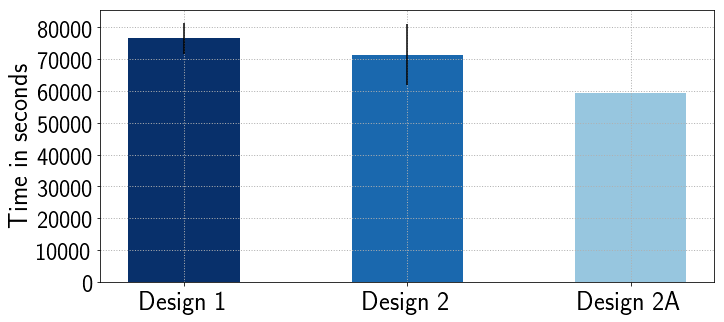

In [20]:
fig, axis = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(11,5)
x1 = np.arange(3)
_ = axis.bar(x1[0],des1DF['TTX'].mean(),yerr=des1DF['TTX'].std(), color=blues(300),width=0.5,label='Design 1 TTX')

_ = axis.bar(x1[1],des2DF['TTX'].mean(),yerr=des2DF['TTX'].std(),width=0.5, color=blues(200), label='Design 2 TTX')

_ = axis.bar(x1[2],des2ADF['TTX'].mean(),#yerr=des2ADF['TTX'].std(),
                width=0.5, color=blues(100), label='Design 2A TTX')
_ = axis.set_xticks([0,1,2])
_ = axis.grid(which='both', linestyle=':', linewidth=1)
_ = axis.set_xticklabels(['Design 1', 'Design 2','Design 2A'], fontsize=26)
_ = axis.set_ylabel('Time in seconds', fontsize=26)
# _ = axis.set_yticks([100,1000,10000,100000])
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=24)
# _ = axis.legend(fontsize=14,loc = 'lower center', bbox_to_anchor = (0,-0.2,1,1), ncol=3)
# fig.subplots_adjust(bottom=0.32)
#fig.savefig('ttx.pdf',dpi=800,bbox='tight')

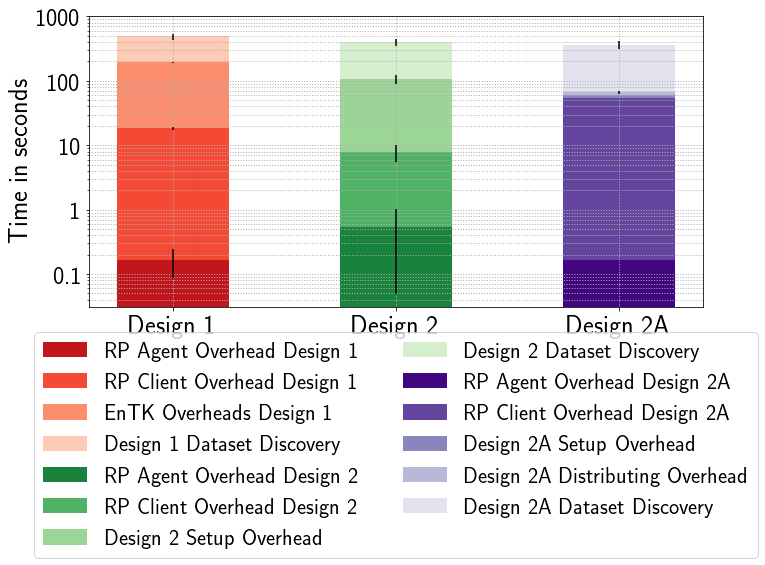

In [86]:
fig, axis = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(11,8.5)
x1 = np.arange(3)

_ = axis.bar(x1[0], des1DF['AgentOverhead'].mean(),yerr=des1DF['AgentOverhead'].std(),width=0.5, color=reds(200),label='RP Agent Overhead Design 1')
_ = axis.bar(x1[0], des1DF['ClientOverhead'].mean(),yerr=des1DF['ClientOverhead'].std(), bottom=des1DF['AgentOverhead'].mean(),width=0.5, color=reds(150),label='RP Client Overhead Design 1')
_ = axis.bar(x1[0], des1DF['EnTKOverhead'].mean(),yerr=des1DF['EnTKOverhead'].std(), bottom=des1DF['ClientOverhead'].mean()+des1DF['AgentOverhead'].mean(),width=0.5, color=reds(100),label='EnTK Overheads Design 1')
_ = axis.bar(x1[0], np.mean(DiscDurations), yerr=np.std(DiscDurations), bottom=des1DF['ClientOverhead'].mean()+des1DF['AgentOverhead'].mean() + des1DF['EnTKOverhead'].mean(), 
                width=0.5, color=reds(50),label='Design 1 Dataset Discovery')

_ = axis.bar(x1[1],des2DF['AgentOverhead'].mean(),yerr=des2DF['AgentOverhead'].std(),width=0.5, color=greens(200),label='RP Agent Overhead Design 2')
_ = axis.bar(x1[1],des2DF['ClientOverhead'].mean(),yerr=des2DF['ClientOverhead'].std(),bottom=des2DF['AgentOverhead'].mean(),width=0.5, color=greens(150),label='RP Client Overhead Design 2')
_ = axis.bar(x1[1],(des2DF['SetupOverhead']+des2DF['SetupOverhead2']).mean(),
                yerr=(des2DF['SetupOverhead']+des2DF['SetupOverhead2']).std(),
                bottom=des2DF['ClientOverhead'].mean()+des2DF['AgentOverhead'].mean(),width=0.5, color=greens(100),label='Design 2 Setup Overhead')
_ = axis.bar(x1[1],np.mean(DiscDurations), yerr=np.std(DiscDurations), bottom=des2DF['ClientOverhead'].mean()+des2DF['AgentOverhead'].mean() + (des2DF['SetupOverhead']+des2DF['SetupOverhead2']).mean(),
                width=0.5, color=greens(50),label='Design 2 Dataset Discovery')


_ = axis.bar(x1[2],des2ADF['AgentOverhead'].mean(),#yerr=des2ADF['AgentOverhead'].std(),
                width=0.5, color=purples(250),label='RP Agent Overhead Design 2A',log=1)
_ = axis.bar(x1[2],des2ADF['ClientOverhead'].mean(),#yerr=des2ADF['ClientOverhead'].std(),
                bottom=des2ADF['AgentOverhead'].mean(),width=0.5, color=purples(200),label='RP Client Overhead Design 2A')
_ = axis.bar(x1[2],des2ADF['SetupOverhead'].mean(),#yerr=des2ADF['SetupOverhead'].std(),
                bottom=des2ADF['ClientOverhead'].mean()+des2ADF['AgentOverhead'].mean(),width=0.5, color=purples(150),label='Design 2A Setup Overhead')
_ = axis.bar(x1[2],dist_overhead.mean(),yerr=dist_overhead.std(),
                bottom=des2ADF['ClientOverhead'].mean()+des2ADF['AgentOverhead'].mean()+des2ADF['SetupOverhead'].mean(),width=0.5, color=purples(100),label='Design 2A Distributing Overhead')
_ = axis.bar(x1[2],np.mean(DiscDurations), yerr=np.std(DiscDurations),
                bottom=des2ADF['ClientOverhead'].mean()+des2ADF['AgentOverhead'].mean()+des2ADF['SetupOverhead'].mean() + dist_overhead.mean(),
                width=0.5, color=purples(50),label='Design 2A Dataset Discovery')


_ = axis.set_xticks([0,1,2])
_ = axis.grid(which='both', linestyle=':', linewidth=1)
_ = axis.set_ylabel('Time in seconds', fontsize=26)
_ = axis.set_xticklabels(['Design 1', 'Design 2','Design 2A'], fontsize=26)
_ = axis.set_yticks([0.1,1,10,100,1000])
_ = axis.set_yticklabels(['0.1']+axis.get_yticks()[1:].astype('int').tolist(),fontsize=24)
_ = axis.legend(fontsize=22,loc = 'lower center', bbox_to_anchor = (0,-.9,1,1), ncol=2)
fig.subplots_adjust(bottom=.405)
# fig.savefig('overheads.pdf',dpi=800,bbox='tight',pad_inches=0)